# Setup

In [1]:
# Importing rquired modules
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
'''Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed 
and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


 '''

'Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed \nand draw inferences.\n\nData Description:\nMurder -- Muder rates in different places of United States\nAssualt- Assualt rate in different places of United States\nUrbanPop - urban population in different places of United States\nRape - Rape rate in different places of United States\n\n\n '

In [3]:
# reading the crime data amd storing to crm
Crm = pd.read_csv("C:/Users/Asus/Documents/Data Science/Assignments/crime_data.csv")

In [4]:
Crm.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
# checking for null values
# There are no null values
Crm.isna().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [7]:
# Selecting numerical columns for the analysis

Crm2= Crm.iloc[:,1:].copy()

In [8]:
Crm2.shape

(50, 4)

In [9]:
Crm2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


# K Means Clustering Technics

In [10]:
# Importing K means from library
from sklearn.cluster import KMeans

In [11]:
# copying the data to df data frame
df = Crm2.copy()

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
# Normalizing the data for Clustering 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [14]:
df2 = norm_func(df)

In [624]:
type(df2)

pandas.core.frame.DataFrame

In [15]:
# finding inertia for clusters range from 2 to 10

l=[]
for i in range(2,10):
    model_kmeans = KMeans(n_clusters=i) 
    model_kmeans.fit(df2)
    l.append(model_kmeans.inertia_)

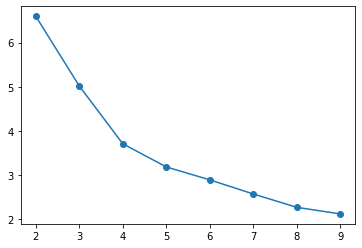

In [16]:
# plotting inertia and  clusters to find out the optimum clusters

plt.scatter(list(range(2,10)),l)
plt.plot(list(range(2,10)),l)


In [ ]:
# From above plot it is evident that at the macimu inertia change available
# but we will check for different scenaris

In [17]:
# Modeling using 2 clustera

model_kmeans = KMeans(n_clusters=2) 
model_kmeans.fit(df2)

KMeans(n_clusters=2)

In [19]:
# predicting for the data

model_kmeans.fit_predict(df2)

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [20]:
model_kmeans.inertia_

6.596893867946199

In [ ]:
# repeating the same for different cluster numbers

In [21]:
model_kmeans = KMeans(n_clusters=3) 
model_kmeans.fit(df2)

KMeans(n_clusters=3)

In [22]:
model_kmeans.fit_predict(df2)

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [23]:
model_kmeans.inertia_

5.016388924690672

In [25]:
# for n =4

In [26]:
model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(df2)

KMeans(n_clusters=4)

In [27]:
model_kmeans.fit_predict(df2)

array([2, 3, 3, 2, 3, 3, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [28]:
model_kmeans.inertia_

3.683456153585915

In [ ]:
# Checking Ch score 

In [29]:
from sklearn.metrics import calinski_harabasz_score as chs

In [30]:
# obtaining ch score for different n

nc=[2,3,4,5,6,7,8,9]
iner=[]    
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(df2)
    iner.append(chs(df2,y))

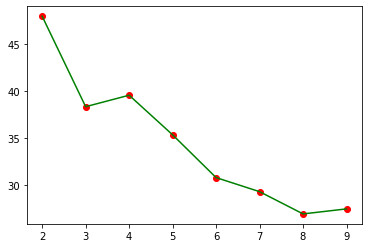

In [33]:
# plotting the same for visualisation
# chs should be high for optimum number of clusters
# though at 2 chs is high fromaove we go for second highscore 
# which is four as above and also has high chs after 2

plt.plot(nc,iner,color="green")
plt.scatter(nc,iner,color="red")
plt.show()

In [34]:
# modeling k means with 4 number clusters

model_kmeans = KMeans(n_clusters=4) 
model_kmeans.fit(df2)

KMeans(n_clusters=4)

In [35]:
# predicting for the data
model_kmeans.fit_predict(df2)

array([2, 3, 3, 2, 3, 3, 1, 1, 3, 2, 1, 0, 3, 1, 0, 1, 0, 2, 0, 3, 1, 3,
       0, 2, 1, 0, 0, 3, 0, 1, 3, 3, 2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 3, 1,
       0, 1, 1, 0, 0, 1])

In [36]:
# the inertia is quite low and we can go for 4 number clusters
model_kmeans.inertia_

3.683456153585915

In [37]:
# loading the reslut to a data frame
cls_crm= pd.DataFrame(model_kmeans.fit_predict(df2))

In [38]:
type(cls_crm)

pandas.core.frame.DataFrame

In [39]:
# copying the original data to Crmfm 
Crmfm = Crm.copy()

In [40]:
# creating column containing predicted values
Crmfm['Cls'] = cls_crm

In [41]:
Crmfm.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cls
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1


In [42]:
# grouping the resultant data based on clusters

Crmfm_ag = Crmfm.groupby('Cls').agg(['mean']).reset_index()
Crmfm_ag

,Cls,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,10.966667,264.000000,76.500000,33.608333
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.852941,141.176471,73.647059,19.335294


In [52]:
# as can be seen from above there are four clusters
# do the same in Heirarchical clustering

# Hierarchical 

In [53]:
# loading the dataleaving categoricalvariables
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


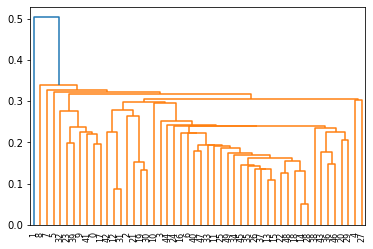

In [742]:
# create dendrogram with single linkage for data
dendrogram = sch.dendrogram(sch.linkage(df2, method='single'))

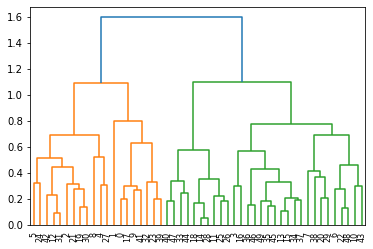

In [743]:
# create dendrogram with complete linkage
dendrogram = sch.dendrogram(sch.linkage(df2, method='complete'))

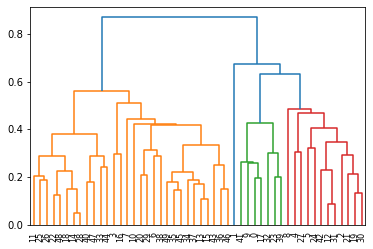

In [744]:
# create dendrogram with  verage linkage
dendrogram = sch.dendrogram(sch.linkage(df2, method='average'))

In [54]:
# from above dendograms it is evident that colpete linkage giving clear seperationa 
# by  using different clusters ;et us model the clustering 

In [55]:
# creating 2 clusters using complete linkage
hc_cr2 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'complete')

In [56]:
# predicting clusters for the data df2
y_hc_cr2 = hc_cr2.fit_predict(df2)

In [57]:
Crm2c = Crm.copy()

In [58]:
# attaching the clusters column to the original data frame
Crm2c['Cls']=y_hc_cr2

In [59]:
Crm2c.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cls
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [61]:
# summerrizing the results clusterwise

Crm2c_m = Crm2c.groupby('Cls').agg(['mean']).reset_index()
Crm2c_m

,Cls,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


In [ ]:
# repeating the same for 4 number of clusters

In [62]:
# create clusters
hc_cr4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [63]:
y_hc_cr4 = hc_cr4.fit_predict(df2)

In [64]:
Crm4c = Crm.copy()

In [65]:
Crm4c['Cls']=y_hc_cr4

In [66]:
Crm4c.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cls
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [67]:
# Summarising the resluts 

Crm4c_m = Crm4c.groupby('Cls').agg(['mean']).reset_index()
Crm4c_m

,Cls,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,14.087500,252.750000,53.500000,24.5375
1,1,5.715000,132.300000,70.800000,18.1000
2,2,3.180000,78.700000,49.300000,11.6300
3,3,10.883333,256.916667,78.333333,32.2500


([<matplotlib.axis.XTick at 0x207b15d6a60>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

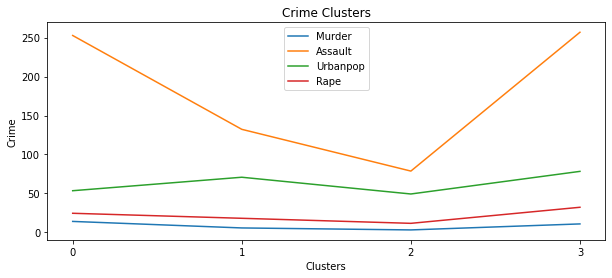

In [76]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(Crm4c_m['Cls'],Crm4c_m['Murder'] , label = 'Murder')
ax.plot(Crm4c_m['Cls'],Crm4c_m['Assault'],label = 'Assault')
ax.plot(Crm4c_m['Cls'],Crm4c_m['UrbanPop'],label = 'Urbanpop' )
ax.plot(Crm4c_m['Cls'],Crm4c_m['Rape'] ,label = 'Rape')
ax.legend(loc='upper center', frameon=True)
plt.title("Crime Clusters")
plt.xlabel("Clusters")
plt.ylabel("Crime")
plt.xticks(np.arange(0, 4, 1))


In [ ]:
# we can vary the number of clsters depending on our requirement

In [102]:
l_0 = Crm4c[Crm4c['Cls']==0]
l_1 = Crm4c[Crm4c['Cls']==1]
l_2 = Crm4c[Crm4c['Cls']==2]
l_3 = Crm4c[Crm4c['Cls']==3]


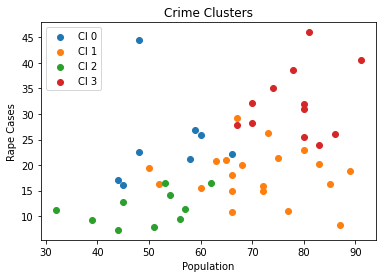

In [124]:
plt.scatter(l_0['UrbanPop'], l_0['Rape'], label = 'Cl 0')
plt.scatter(l_1['UrbanPop'], l_1['Rape'], label = 'Cl 1')
plt.scatter(l_2['UrbanPop'], l_2['Rape'], label = 'Cl 2')
plt.scatter(l_3['UrbanPop'], l_3['Rape'], label = 'Cl 3')
plt.title("Crime Clusters")
plt.xlabel("Population")
plt.ylabel("Rape Cases")
plt.legend(loc='upper left', frameon=True)


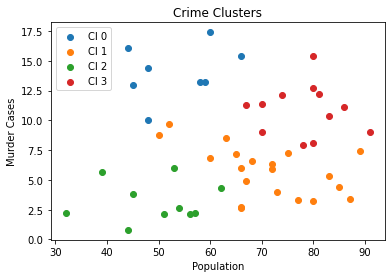

In [125]:

plt.scatter(l_0['UrbanPop'], l_0['Murder'], label = 'Cl 0')
plt.scatter(l_1['UrbanPop'], l_1['Murder'], label = 'Cl 1')
plt.scatter(l_2['UrbanPop'], l_2['Murder'], label = 'Cl 2')
plt.scatter(l_3['UrbanPop'], l_3['Murder'], label = 'Cl 3')
plt.title("Crime Clusters")
plt.xlabel("Population")
plt.ylabel("Murder Cases")
plt.legend(loc='upper left', frameon=True)

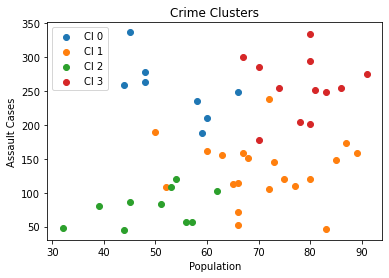

In [126]:

plt.scatter(l_0['UrbanPop'], l_0['Assault'], label = 'Cl 0')
plt.scatter(l_1['UrbanPop'], l_1['Assault'], label = 'Cl 1')
plt.scatter(l_2['UrbanPop'], l_2['Assault'], label = 'Cl 2')
plt.scatter(l_3['UrbanPop'], l_3['Assault'], label = 'Cl 3')
plt.title("Crime Clusters")
plt.xlabel("Population")
plt.ylabel("Assault Cases")
plt.legend(loc='upper left', frameon=True)

# DBSCAN

In [127]:
# importing required Libraries

from sklearn.cluster import DBSCAN 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [128]:
# copying the data to Crm_db
Crm_db = Crm.copy()

In [129]:
# Coverting to Array
array=df2.values
X= array

In [130]:
# Standardising the array
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [136]:
# finding number of clusters for different Eps and sample values 
eps = [.2, .4, .6,.8, 1.0]
poi = [2,4,6,8,10]
clsdf = pd.DataFrame()
for i in eps:
    for j in poi:
        dbscan = DBSCAN(eps=i, min_samples=j)
        dbscan.fit(array)
        cls = dbscan.labels_.max() + 1
        print(' For radious of       {}     and    points of     {:2d}     the    Cluster number is :     {}'. format(i,j,cls))



 For radious of       0.2     and    points of      2     the    Cluster number is :     6
 For radious of       0.2     and    points of      4     the    Cluster number is :     1
 For radious of       0.2     and    points of      6     the    Cluster number is :     1
 For radious of       0.2     and    points of      8     the    Cluster number is :     0
 For radious of       0.2     and    points of     10     the    Cluster number is :     0
 For radious of       0.4     and    points of      2     the    Cluster number is :     1
 For radious of       0.4     and    points of      4     the    Cluster number is :     1
 For radious of       0.4     and    points of      6     the    Cluster number is :     1
 For radious of       0.4     and    points of      8     the    Cluster number is :     1
 For radious of       0.4     and    points of     10     the    Cluster number is :     1
 For radious of       0.6     and    points of      2     the    Cluster number is :     1

In [137]:
#It is difficult to find Eps and sample point with out have clear understanding of what we are expecting
# as thevalues can range from any to any it is difficult to fix on some values randomply
# let us check the Nearsest neighbers distance at least to fix on the radius

In [144]:
#Importing the required libraries 

from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(df2)

distances, indices = nbrs.kneighbors(df2)

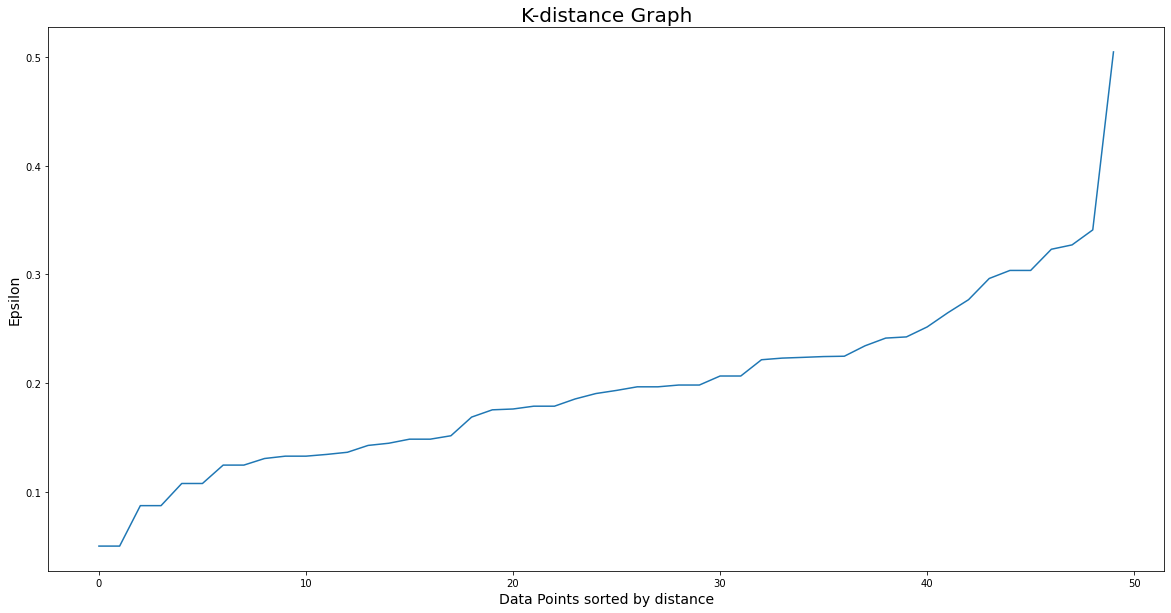

In [145]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [146]:
# eps will be where maximum xurvature occurs
# From above graph it is aound 0.3

In [204]:
dbscan = DBSCAN(eps=.3, min_samples=3)


In [205]:
dbscan.fit(array)

DBSCAN(eps=0.3, min_samples=3)

In [206]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [207]:
cl.head()

,cluster
0,0
1,-1
2,1
3,1
4,-1


In [208]:
Crm_dbm = pd.concat([Crm_db,cl],axis=1)

In [209]:
Crm_dbm.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [210]:
Crm_dbm2 = Crm_dbm.groupby('cluster').agg(['mean']).reset_index()
Crm_dbm2

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.066667,261.333333,75.000000,36.250000
1,0,14.671429,251.285714,54.285714,21.685714
2,1,6.116216,140.837838,66.135135,18.710811


In [211]:
# after trying many sizes it is found that for eps = 0.3 upto 10 the number of clusters are given is two
# beyornd it is coverging to only one cluster
# so it is not good to use DB scam for this data
# Hierarchical method is bestfor this data